In [54]:
import pandas as pd
f=pd.read_csv('titanic_data.csv')
f.shape

(891, 12)

In [55]:
f.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
f = f[['Pclass','Fare','Survived','Sex']]
f=f.dropna()
f.shape

(891, 4)

In [57]:
f = pd.concat([f,pd.get_dummies(f['Sex'], prefix='Sex',
                                 dummy_na=True)],axis=1).drop(['Sex'],axis=1)
f.head()

,Pclass,Fare,Survived,Sex_female,Sex_male,Sex_nan
0,3,7.2500,0,0,1,0
1,1,71.2833,1,1,0,0
2,3,7.9250,1,1,0,0
3,1,53.1000,1,1,0,0
4,3,8.0500,0,0,1,0


In [58]:
X = f[['Pclass','Fare','Sex_female','Sex_male']]
y = f[['Survived']]

In [59]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import numpy as np

In [62]:
parameters = { 'C':np.arange(1,11)}
svc = svm.SVC()
SVM=GridSearchCV(svc, parameters)

In [63]:
SVM.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
SVM.best_estimator_

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
pred = SVM.predict(X_test)

In [66]:
import sklearn.metrics as sklm
%matplotlib inline
import matplotlib.pyplot as plt

def print_metrics_3(label, predict):
    
    conf = sklm.confusion_matrix(label, predict)
    print('                 Confusion matrix')
    print('                 Survie           Die   ')
    print('Survie      %6d' % conf[0,0] + '            %5d' % conf[0,1] )
    print('Die          %6d' % conf[1,0] + '            %5d' % conf[1,1] )
    plt.imshow(conf)
    
    metrics = sklm.precision_recall_fscore_support(label, predict)

    print('                   Survie           Die   ')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] )
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] )
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1])
    
    acc = sklm.accuracy_score(label, predict)
    print('Accuracy ',acc)

                 Confusion matrix
                 Survie           Die   
Survie         138               19
Die              34               77
                   Survie           Die   
Num case   157.00     111.00
Precision   0.80      0.80
Recall      0.88      0.69
F1          0.84      0.74
Accuracy  0.8022388059701493


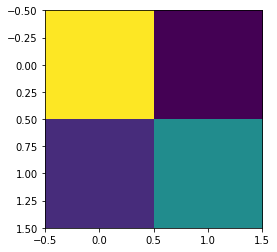

In [67]:
print_metrics_3(y_test,pred)

In [68]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [69]:
SVM.best_estimator_

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

                 Confusion matrix
                 Survie           Die   
Survie         140               17
Die              36               75
                   Survie           Die   
Num case   157.00     111.00
Precision   0.80      0.82
Recall      0.89      0.68
F1          0.84      0.74
Accuracy  0.8022388059701493


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


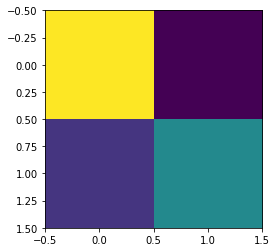

In [70]:
svc = svm.SVC(C=1)
svc.fit(X_train,y_train)
pred = svc.predict(X_test)
print_metrics_3(y_test,pred)